## раздел 2

In [1]:
import csv
import scipy.stats
import scipy.special
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [2]:
def get_sample(file_name, sample_num=0):
    with open(file_name) as f:
        reader = csv.reader(f)
        sample = [line[sample_num] for line in reader][1:]

    if '' in sample:
        sample.remove('')
    sample = list(map(float, sample))
    return sample

### Задание 1
Требуется проверить гипотезу однородности выборок в ситуации, когда в качестве альтернативы ожидается, что значения в 1-й выборке будут «равномерно»
меньше значений во второй выборке.

α = 0.1

### Критерий Вилкоксона
Критерий применим в тех случаях, когда признаки измерены, по крайней мере, в порядковой шкале. Целесообразно применять данный критерий, когда величина самих сдвигов варьирует в некотором диапазоне (10—15 % от их величины). Это объясняется тем, что разброс значений сдвигов должен быть таким, чтобы появлялась возможность их ранжирования. В случае если сдвиги незначительно различаются между собой и принимают какие-то конечные значения (например. +1, -1 и 0), формальных препятствий к применению критерия нет, но, ввиду большого числа одинаковых рангов, ранжирование утрачивает смысл.

нулевая гипотеза однородности:<br>
$H_0$ : $F_Y$(x) = $F_X$(x), $\forall x$.<br>
В качестве альтернативы однородности выборок выдвигается гипотеза:<br>
$H_1$ : $F_Y$(x) < $F_X$(x), $\forall x$.

In [3]:
def add_ranks(general_row):
    repeats = []
    flag = False
    for index in range(len(general_row) - 1):
        general_row[index][2] = index + 1
        if index < len(general_row) - 1 and general_row[index][1] == general_row[index + 1][1]:
            repeats.append(index + 1)
            flag = True
        elif flag:
            repeats.append(index + 1)
            avg = sum(repeats) / len(repeats)
            for i in repeats:
                general_row[i - 1][2] = avg
            repeats = []
            flag = False

In [4]:
sample1 = get_sample('r2z1.csv', 0)
sample2 = get_sample('r2z1.csv', 1)

In [5]:
n1 = len(sample1)
n2 = len(sample2)

In [6]:
print(f'объём выборки 1: {n1}')
print(f'выборка 1: {sample1}')

объём выборки 1: 29
выборка 1: [40.0, 48.4, 48.0, 34.7, 28.8, 33.4, 65.3, 54.9, 37.6, 22.7, 37.7, 26.4, 48.3, 48.5, 30.6, 27.3, 27.3, 53.8, 31.4, 43.3, 54.4, 35.9, 66.7, 55.0, 34.5, 57.5, 38.7, 40.3, 25.7]


In [7]:
print(f'объём выборки 2: {n2}')
print(f'выборка 2: {sample2}')

объём выборки 2: 28
выборка 2: [54.0, 53.4, 65.4, 68.1, 51.3, 35.7, 59.0, 39.8, 72.8, 75.1, 51.7, 32.5, 39.0, 63.7, 78.5, 48.1, 73.1, 67.1, 43.4, 33.6, 35.6, 48.4, 73.1, 77.9, 61.6, 74.9, 37.7, 39.8]


In [8]:
general_row = [[1, value, 0] for value in sample1] + \
              [[2, value, 0] for value in sample2]
general_row.sort(key=lambda tup: tup[1])
add_ranks(general_row)
print(f'объединённый вариационный ряд:\n{general_row}')

объединённый вариационный ряд:
[[1, 22.7, 1], [1, 25.7, 2], [1, 26.4, 3], [1, 27.3, 4.5], [1, 27.3, 4.5], [1, 28.8, 6], [1, 30.6, 7], [1, 31.4, 8], [2, 32.5, 9], [1, 33.4, 10], [2, 33.6, 11], [1, 34.5, 12], [1, 34.7, 13], [2, 35.6, 14], [2, 35.7, 15], [1, 35.9, 16], [1, 37.6, 17], [1, 37.7, 18.5], [2, 37.7, 18.5], [1, 38.7, 20], [2, 39.0, 21], [2, 39.8, 22.5], [2, 39.8, 22.5], [1, 40.0, 24], [1, 40.3, 25], [1, 43.3, 26], [2, 43.4, 27], [1, 48.0, 28], [2, 48.1, 29], [1, 48.3, 30], [1, 48.4, 31.5], [2, 48.4, 31.5], [1, 48.5, 33], [2, 51.3, 34], [2, 51.7, 35], [2, 53.4, 36], [1, 53.8, 37], [2, 54.0, 38], [1, 54.4, 39], [1, 54.9, 40], [1, 55.0, 41], [1, 57.5, 42], [2, 59.0, 43], [2, 61.6, 44], [2, 63.7, 45], [1, 65.3, 46], [2, 65.4, 47], [1, 66.7, 48], [2, 67.1, 49], [2, 68.1, 50], [2, 72.8, 51], [2, 73.1, 52.5], [2, 73.1, 52.5], [2, 74.9, 54], [2, 75.1, 55], [2, 77.9, 56], [2, 78.5, 0]]


In [9]:
sum_rank_of_sample1 = sum(tup[2] for tup in general_row if tup[0] == 1)
print(f'сумма рангов первой выборки: {sum_rank_of_sample1}')

сумма рангов первой выборки: 633.0


In [10]:
mean = n1 * (n1 + n2 + 1) / 2 + 0.5
dispersion = n1 * n2 * (n1 + n2 + 1) / 12
std = dispersion ** 0.5

# mean = sum(sample1 + sample2) / (n1 + n2)
# dispersion = sum([(elem - mean) ** 2 for elem in sample1 + sample2]) / (n1 + n2)
# std = dispersion ** 0.5

print('характеристики фии распределения Вилкоксона:')
print(f'\tмат ожидание: {mean}')
print(f'\tдисперсия: {dispersion}')
print(f'\tстандартное отклонение: {std}')
wilcoxon_distribution = scipy.stats.norm(loc=mean, scale=std)

характеристики фии распределения Вилкоксона:
	мат ожидание: 841.5
	дисперсия: 3924.6666666666665
	стандартное отклонение: 62.64716008460931


In [11]:
alpha = 0.1
c_critical = wilcoxon_distribution.ppf(1 - alpha)
print(f'C_критическое: {c_critical}')

C_критическое: 921.7855660833543


#### нулевая гипотеза принимается так как $w >  С_{крит}$

In [12]:
standard_normal_distribution = scipy.stats.norm(loc=0, scale=1)
p_value = 1 - standard_normal_distribution.cdf((sum_rank_of_sample1 - mean) / std)
print(f'p значение: {p_value}')

p значение: 0.9995628974908843


#### нулевая гипотеза принимается  так как $p_{value} >  \alpha$

### Задание 2
Требуется произвести проверку гипотезы о том, что предоставленная выборка соответствует экспоненциальному распределению. Проверка гипотезы осуществляется с помощью критерия согласия Колмогорова.<br><br>
α = 0.1<br>
$H_0$: X ∼ E(λ = 1)

In [13]:
def plot_ecdf(sample):
    hist, edges = np.histogram(sample, bins=len(sample))
    heights = hist.cumsum()
    heights = [height / len(sample) for height in heights]

    scale = (max(sample) - min(sample)) / 10

    plt.plot([edges[0] - scale, edges[0]], [0, 0], c='red')
    for i in range(len(heights)):
        plt.plot([edges[i], edges[i + 1]], [heights[i], heights[i]], c='red')
    plt.plot([edges[-1], edges[-1] + scale], [1, 1], c='red')
    
    plt.axis([edges[0] - scale, edges[-1] + scale, 0, 1 + scale])

In [14]:
sample = get_sample('r2z22.csv')
sample = sorted(sample)

In [15]:
n = len(sample)

In [16]:
print(f'объём выборки: {n}')
print(f'вариационный ряд: {sample}')

объём выборки: 94
вариационный ряд: [-1.37385983636171, -1.19206298015878, -0.808950729061196, -0.775068234724488, -0.51297916193017, -0.394788848138718, -0.327053360452185, -0.302048136039895, -0.272840688397384, -0.158961891118256, -0.126409802120381, -0.0729199888024632, 0.0118585822417491, 0.0156904805678122, 0.0281504648436162, 0.0845992773578725, 0.179535492742257, 0.194206747520436, 0.209507813876265, 0.224722873278799, 0.297729643413151, 0.362826284989112, 0.39484097841573, 0.454095098306566, 0.462615924192093, 0.515158484207372, 0.566797905397702, 0.619127770633839, 0.697290494605818, 0.700510036197607, 0.708477380011994, 0.753408565502319, 0.790215981005408, 0.795180739680021, 0.813410420699843, 0.888104124215789, 0.898299713663285, 0.93092641812378, 0.989617706350417, 1.03124236478853, 1.04645960902814, 1.08362147728417, 1.09219902970505, 1.12517323431435, 1.18007440427389, 1.18668358722645, 1.20057676933459, 1.23460798217654, 1.30929208478135, 1.31757981412355, 1.3588242768

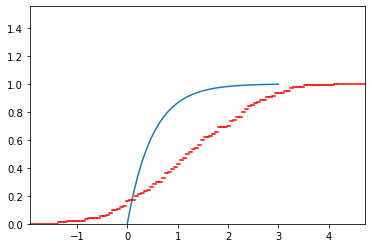

In [17]:
lamb = 2
x_exp = np.linspace(0, 3, 5000)
y_exp = scipy.stats.expon.cdf(x_exp, scale=1/lamb)
plt.plot(x_exp, y_exp)

plot_ecdf(sample)

plt.show()

In [18]:
def sample_cdf(sample):
    hist, edges = np.histogram(sample, bins=len(sample))
    heights = hist.cumsum()
    heights = [height / len(sample) for height in heights]

    scale = (max(sample) - min(sample)) / 10
    
    def f(x):
        if x <= edges[0]:
            return 0

        for i in range(len(heights)):
            if edges[i] < x <= edges[i + 1]:
                return heights[i]
        if edges[-1] < x:
                return 1
            
    return f

In [19]:
eps = 1e-10
extend_sample = []
for x in sample:
    extend_sample.append(x)
    extend_sample.append(x + eps)

In [20]:
f = sample_cdf(sample)
difs = [abs(scipy.stats.expon.cdf(x, scale=1/lamb) - f(x)) for x in extend_sample]

In [21]:
sup = max(difs)
statistic = (len(sample) ** 0.5) * sup

In [22]:
print(f'sqrt(n)Dn = {statistic}')

sqrt(n)Dn = 4.33702924378484


In [23]:
alpha = 0.05
c_critical = (-0.5 * math.log((alpha) / 2)) ** 0.5
#c_critical = scipy.special.kolmogi(alpha)

In [24]:
print(f'C_критическое: {c_critical}')

C_критическое: 1.3581015157406195


#### нулевая гипотеза отвергается в пользу альтернативной так как $\sqrt{n}D_n >  С_{крит}$

In [25]:
#p_value = 1 - 2 * (math.e ** (-2 * (statistic ** 2)))
p_value = scipy.special.kolmogorov(statistic)

In [26]:
print(f'p значение: {p_value}')

p значение: 9.183867742092247e-17


#### нулевая гипотеза отвергается в пользу альтернативной так как $p_{value} <  \alpha$